<a href="https://colab.research.google.com/github/zj71/Computer-Vision/blob/main/%E2%80%9CCV_Lab_Session_6_Solutions_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
In this lab we will experiment with a simple system for image classification! There's a few blanks to fill in lower down in the sheet, although more of the code blocks than usual won't need to be touched.

You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already.

The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

# Getting Data
Let's download the CIFAR-10 dataset from [Alex Krizhevsky's homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
!wget "http://www.cs.utoronto.ca/~kriz/cifar-10-python.tar.gz"
!tar -xvzf "cifar-10-python.tar.gz"


--2021-03-07 20:59:19--  http://www.cs.utoronto.ca/~kriz/cifar-10-python.tar.gz
Resolving www.cs.utoronto.ca (www.cs.utoronto.ca)... 128.100.3.30
Connecting to www.cs.utoronto.ca (www.cs.utoronto.ca)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  48.1MB/s    in 3.6s    

2021-03-07 20:59:22 (45.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


# Data Preparation
A common task in machine learning and computer vision is getting the data in the right format! Here we unpack the cifar data dictionaries and load them as Python arrays.

In the second code block, we convert the images to being of the correct form (32x32x3). We also select only the airplane and truck images for now.

In [ ]:
# We need to 'unpickle' the file to load it into python
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load each of the data batches from the files 
data_batches = [unpickle("cifar-10-batches-py/data_batch_"+str(i+1)) for i in range(5)]
# Also read the test batch
test_batch = unpickle("cifar-10-batches-py/test_batch")

# Each batch is loaded as a dictionary
# Look at what keys are in it.
print(data_batches[0].keys())
print(data_batches[0][b'data'].shape)
print(data_batches[0][b'labels'])


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 3072)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9,

In [ ]:
import numpy as np
def convert_to_rgb(cifar_im):
  im_rgb = np.reshape(cifar_im, (-1, 3, 32, 32))
  im_rgb = np.stack([im_rgb[:,i,...] for i in range(3)], axis=-1)
  return im_rgb

def select_images_of_class(_data_batches, class_index):
  # Create a numpy array using all the data_batches that contains only the images 
  # of the specified class index
  # Use a list initialisation, make a boolean array for all the labels in a batch
  # that have a particular class label. Use this to index the data in each of the batches
  to_concat = [batch[b'data'][np.array(batch[b'labels'])==class_index,...] for batch in _data_batches]
  # Concatenate to make one long array with all the examples from a particular class
  images_of_class = np.concatenate(to_concat, axis=0)

  # Convert the image format such that the colour channels are at the end
  images_of_class = convert_to_rgb(images_of_class)
  return images_of_class

# Select the plane images (index 0)
class1 = select_images_of_class(data_batches, 0)
test_class1 = select_images_of_class([test_batch], 0)
# Select the truck images (index 9)
class2 = select_images_of_class(data_batches, 9)
test_class2 = select_images_of_class([test_batch], 9)

# Make a big array of images of both classes
train_data = np.concatenate([class1, class2], axis=0)
# Create a label array (1s for class 1, zeros for class 2)
train_labels = [np.ones((class1.shape[0]), dtype=np.uint8), np.zeros((class1.shape[0]), dtype=np.uint8)]
train_labels = np.concatenate(train_labels, axis=0)

# Do the same for the test data
test_data = np.concatenate([test_class1, test_class2], axis=0)
test_labels = np.concatenate([np.ones((test_class1.shape[0]), dtype=np.uint8), np.zeros((test_class2.shape[0]), dtype=np.uint8)], axis=0)



# Data Visualisation
It's always good to check that your data makes sense! Let's drawing some samples from our training set

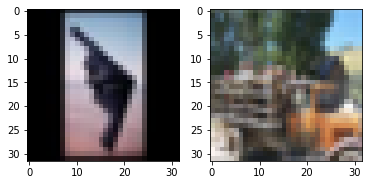

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

plt.subplot(121)
plt.imshow(class1[np.random.randint(0, class1.shape[0]),...])
plt.subplot(122)
plt.imshow(class2[np.random.randint(0, class2.shape[0]),...])
plt.show()

# Classifier training code
I'll define some classifier training code here, using SVMs from [scikitlearn](https://scikit-learn.org/stable/modules/svm.html#classification). Please feel free to adjust the method and parameters, but this is sufficient to get you started.

I've also written a function that takes an np.array of images and applies a function "feature_fn" on each image and returns a list of image features. You don't need to adjust this function, and we will see it in action in the next section.

In [ ]:
def train_classifier(_train_data, _train_labels):
  from sklearn import svm
  # Create an SVM object
  clf = svm.SVC()
  # Make sure the features have been flattened per image
  _train_data = np.reshape(_train_data, (_train_data.shape[0], -1))
  # Fit the SVM and return it
  clf.fit(_train_data, _train_labels)
  return clf

def calculate_image_features(data, feature_fn, feature_fn_kwargs = {}):
  # Apply the function feature_fn to each image in the array data and stack the features
  # Pass any keyword arguments for the feature_fn in a dictionary to feature_fn_kwargs
  features = []
  for img_idx in range(data.shape[0]):
    img_data = data[img_idx,...]
    features.append(feature_fn(img_data, **feature_fn_kwargs))

  return np.stack(features, axis=0)

# Colour based features
The code below show how we could construct histograms of each of the colour channels, and using the counts from each bin as image features. Note that we pass the function calculate_colour_histogram to calculate_image_features.
Initially you don't need to change anything here.

In [ ]:
def calculate_colour_histogram(_image, _bins = 10):
  # Use np.histogram (note it's different from plt.hist) and make a histogram
  # of each colour channel with _bins number of bins
  # concatenate all these features together to describe the image
  # Need to set the histogram range manually, otherwise it uses the min/max of each image
  red_hist = np.histogram(_image[:,:,0], bins=_bins, range=(0,255))[0]
  green_hist = np.histogram(_image[:,:,1], bins=_bins, range=(0,255))[0]
  blue_hist = np.histogram(_image[:,:,2], bins=_bins, range=(0,255))[0]
  color_hist_features = np.concatenate([red_hist, green_hist, blue_hist], axis=0)
  return color_hist_features

# Calculate the colour features for all the training data and the test data
train_features = calculate_image_features(train_data, calculate_colour_histogram, {'_bins':10})

test_features = calculate_image_features(test_data, calculate_colour_histogram, {'_bins':10})

# Training the classifier and testing model performance
We can now train the classifier using the code we defined previously. 

To test the quality of the classification, scikitlearn provides plenty of [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) that could be useful. Let's start with accuracy.

Run the code below and see how well the model does using these colour based features.

1. Test a range of different numbers of bins for the colour histograms (you'll need to recalculate the features and retrain and test for each number of bins), and draw a plot (using plt.plot) of number of bins vs. accuracy (or whichever metric you prefer).



0.843


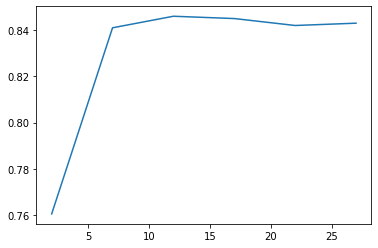

In [ ]:
from sklearn import metrics
clf = train_classifier(train_features, train_labels)

test_predictions = clf.predict(test_features)
accuracy = metrics.accuracy_score(test_predictions, test_labels)
print(accuracy)

x = []
y = []
for no_bins in range(2, 30, 5):
  train_features = calculate_image_features(train_data, calculate_colour_histogram, {'_bins':no_bins})
  test_features = calculate_image_features(test_data, calculate_colour_histogram, {'_bins':no_bins})
  clf = train_classifier(train_features, train_labels)
  test_predictions = clf.predict(test_features)
  y.append(metrics.accuracy_score(test_predictions, test_labels))
  x.append(no_bins)

plt.plot(x, y)

# Gradient Features
Now we've seen how we construct some image features and use them to create an image classification system, why don't we try using image gradient features. We will need to write a new feature_function like calculate_colour_histogram

1. Calculate Sobel features in x and y using [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html) or your code from a previous lab. Remember to make the image grayscale first!

2. Calculate the gradient orientations (using [np.arctan2](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html) see the [wiki page](https://en.wikipedia.org/wiki/Atan2), look at the descriptors lectures for details of why)

3. Calculate a histogram of the gradient orientations and return that as the features. Make sure you set the range of the histogram to ensure consistent bins across images! Look at the code for the colour histograms for some ideas on how to use [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) effectively.

4. Train and test a classifier using the histogram of gradient orientation features.

5. Calculate a plot of how the classifier accuracy varies with the number of gradient orientation bins.

6. Concatenate the colour and gradient features together and using those for classification.




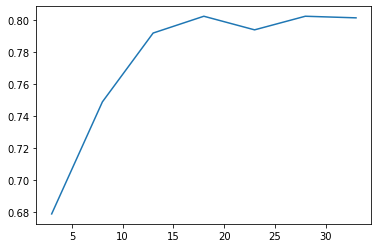

In [ ]:
def calculate_gradient_features(_image, _bins=10):
  import cv2
  _image = np.mean(_image, axis=-1)
  sobelx = cv2.Sobel(_image,cv2.CV_64F,1,0,ksize=5)
  sobely = cv2.Sobel(_image,cv2.CV_64F,0,1,ksize=5)
  orientation_image = np.arctan2(sobely, sobelx)
  features = np.histogram(orientation_image, bins=_bins, range=(-np.pi, np.pi))[0]
  return features

x = []
y = []
for no_bins in range(3, 35, 5):
  train_features = calculate_image_features(train_data, calculate_gradient_features, {'_bins':no_bins})
  test_features = calculate_image_features(test_data, calculate_gradient_features, {'_bins':no_bins})
  clf = train_classifier(train_features, train_labels)
  test_predictions = clf.predict(test_features)
  y.append(metrics.accuracy_score(test_predictions, test_labels))
  x.append(no_bins)

plt.plot(x, y)
plt.show()



In [ ]:
train_features_grad = calculate_image_features(train_data, calculate_gradient_features, {'_bins':18})
test_features_grad = calculate_image_features(test_data, calculate_gradient_features, {'_bins':18})
train_features_col = calculate_image_features(train_data, calculate_colour_histogram, {'_bins':25})
test_features_col = calculate_image_features(test_data, calculate_colour_histogram, {'_bins':25})

train_features = np.concatenate([train_features_grad, train_features_col], axis=-1)
test_features = np.concatenate([test_features_grad, test_features_col], axis=-1)
clf = train_classifier(train_features, train_labels)

test_predictions = clf.predict(test_features)
accuracy = metrics.accuracy_score(test_predictions, test_labels)
print(accuracy)

0.8755


# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ You could also consider using dimensionality reduction tools, such as PCA, either on the colour and/or gradient features, or on the image data itself as a different type of feature.
+ Experiment with the classifer, try changing the classifier type and parameterisations.
+ Use k-fold cross-validation within the training set to find the best model, rather than validating on the test set.
+ Try looking at different pairs of classes (I've deliberatly selected easier ones)
+ Try using the pixel values directly as features, does this work well? 
+ Would some data pre-processing help? Maybe smoothing the image with a Gaussian filter?
+ Weight the gradient orientation histogram counts by the edge magnitude as done in SIFT and HOG. Does this improve things?



